In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import os
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action = 'ignore') # to remove error while coading

In [4]:
df= pd.read_csv('data/brain_stroke.csv')

In [264]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_range
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60-70
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,70-80
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,40-50
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,70-80
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,80-90
...,...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0,40-50
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0,30-40
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0,40-50
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0,30-40


In [23]:
bins = [0,10,20,30,40,50,60,70,80,90]
label= ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']

df['age_range'] = pd.cut(df['age'], bins=bins, labels=label )

df['age_range'] 

0       60-70
1       70-80
2       40-50
3       70-80
4       80-90
        ...  
4976    40-50
4977    30-40
4978    40-50
4979    30-40
4980    70-80
Name: age_range, Length: 4981, dtype: category
Categories (9, object): ['0-10' < '10-20' < '20-30' < '30-40' ... '50-60' < '60-70' < '70-80' < '80-90']

In [25]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_range'],
      dtype='object')

In [31]:
stroke_data = pd.crosstab(df['age_range'], df['stroke'])
stroke_data

stroke,0,1
age_range,,
0-10,492,1
10-20,494,1
20-30,532,0
30-40,652,6
40-50,696,14
50-60,750,49
60-70,538,49
70-80,486,105
80-90,93,23


In [33]:
stroke_data.rename(columns={0:'No Stroke', 1:'Stroke'}, inplace=True)

stroke_data

stroke,No Stroke,Stroke
age_range,,
0-10,492,1
10-20,494,1
20-30,532,0
30-40,652,6
40-50,696,14
50-60,750,49
60-70,538,49
70-80,486,105
80-90,93,23


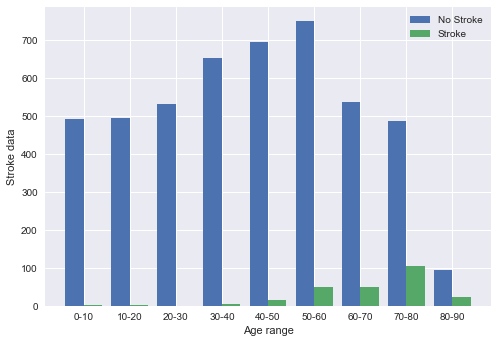

In [57]:
plt.style.use('seaborn')

ax= plt.subplots(nrows= 1, ncols= 1)

x_axis= np.arange(len(stroke_data))

plt.bar(x_axis-0.2, stroke_data['No Stroke'], 0.4, label= 'No Stroke')
plt.bar(x_axis+0.2, stroke_data['Stroke'], 0.4, label= 'Stroke')

plt.xticks(x_axis, stroke_data.index)

plt.xlabel('Age range')
plt.ylabel('Stroke data')

# [ax[0, 0].bar_label(i) for i in ax[0, 0].containers]
plt.legend()
plt.show()

In [58]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_range'],
      dtype='object')

In [144]:
# ma_st_val = df.loc[df['gender']=='Male', 'stroke'].value_counts().values
# ma_st_in = df.loc[df['gender']=='Male', 'stroke'].value_counts().index


# fm_st_val = df.loc[df['gender']=='Female', 'stroke'].value_counts().values
# fm_st_in = df.loc[df['gender']=='Female', 'stroke'].value_counts().index

In [156]:
gender_data = pd.crosstab(df['gender'],df['stroke'])

In [157]:
gender_data

stroke,0,1
gender,,
Female,2767,140
Male,1966,108


In [175]:
gender_data_index = gender_data.index
gender_data_value1 = gender_data[0]
gender_data_value2 = gender_data[1]


In [174]:
gender_data.values[0]

array([2767,  140], dtype=int64)

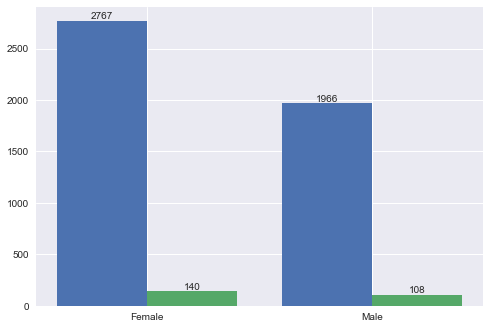

In [182]:
plt.style.use('seaborn')

x_axis= np.arange(len(gender_data))

ax= plt.subplot2grid((2,2), (0,0), 2, 2)

plt.bar(x_axis-0.2, gender_data_value1, 0.4)
plt.bar(x_axis+0.2, gender_data_value2, 0.4)

plt.xticks(x_axis, gender_data_index)

[plt.bar_label(i) for i in ax.containers]

plt.show()

In [183]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_range'],
      dtype='object')

In [197]:
x = df['work_type'].value_counts()
xl = df['work_type'].value_counts().values

x.index

Index(['Private', 'Self-employed', 'children', 'Govt_job'], dtype='object')

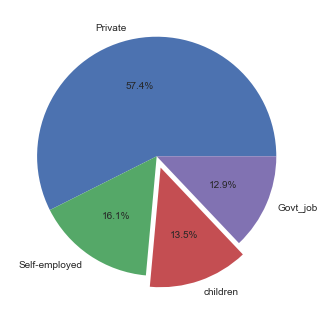

In [213]:
plt.style.use('seaborn')

# ax= plt.subplot(nrows =1, ncols=1)

plt.pie(x, labels=(x.index), autopct="%1.1f%%", explode = [0,0,0.1,0])

plt.show()

In [214]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_range'],
      dtype='object')

In [237]:
df_cat= df[['gender', 'hypertension', 'heart_disease', 'ever_married','work_type', 'Residence_type', 
                 'smoking_status', 'stroke']]

In [245]:
for i in df_cat:
    print(df_cat[i].unique())

['Male' 'Female']
[0 1]
[1 0]
['Yes' 'No']
['Private' 'Self-employed' 'Govt_job' 'children']
['Urban' 'Rural']
['formerly smoked' 'never smoked' 'smokes' 'Unknown']
[1 0]


In [244]:
for i in df_cat:
    print(df_cat[i].value_counts())

Female    2907
Male      2074
Name: gender, dtype: int64
0    4502
1     479
Name: hypertension, dtype: int64
0    4706
1     275
Name: heart_disease, dtype: int64
Yes    3280
No     1701
Name: ever_married, dtype: int64
Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64
Urban    2532
Rural    2449
Name: Residence_type, dtype: int64
never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64
0    4733
1     248
Name: stroke, dtype: int64


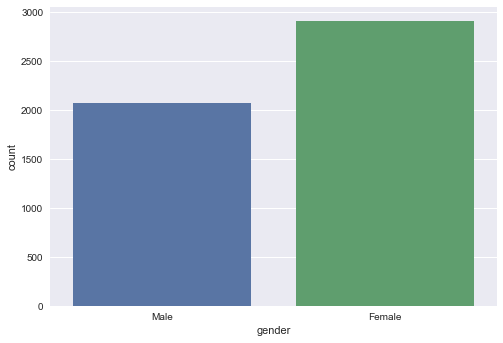

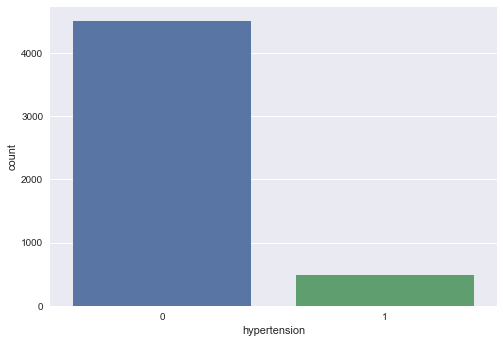

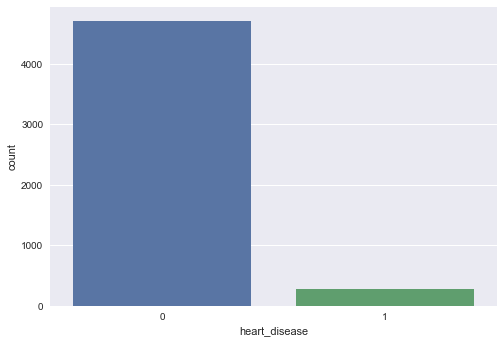

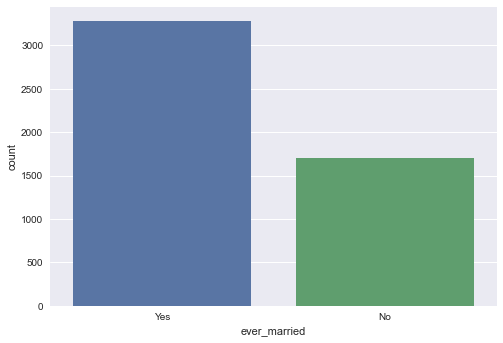

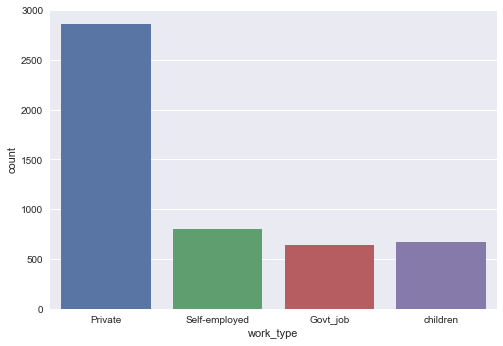

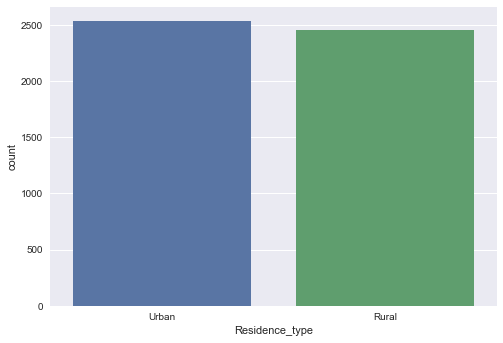

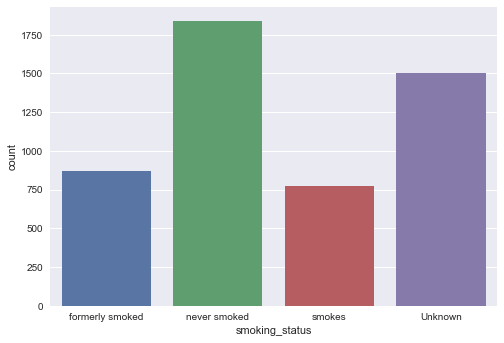

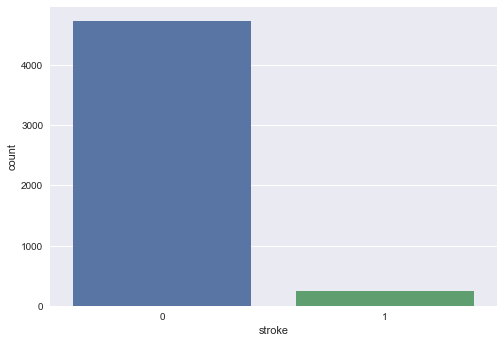

In [256]:
for i in df_cat.columns:
    sns.countplot(df_cat[i], data= df_cat)
    plt.show()

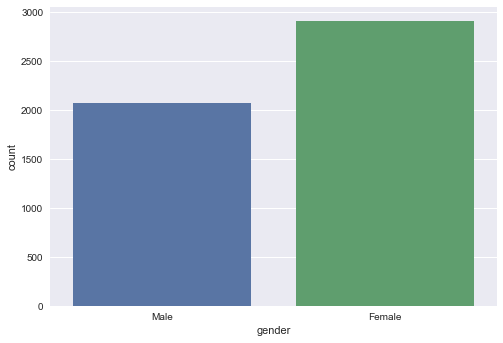

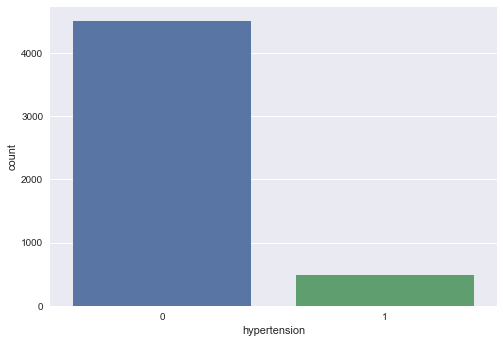

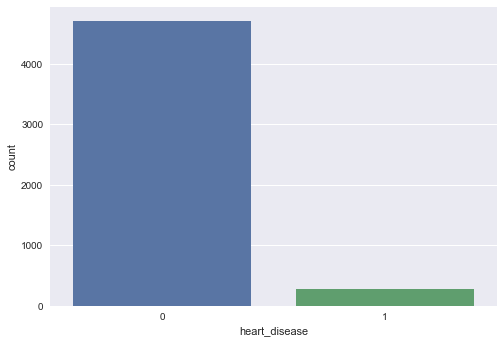

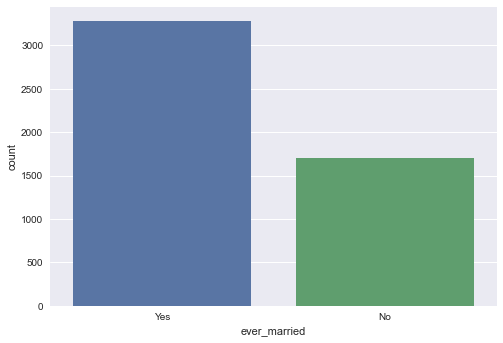

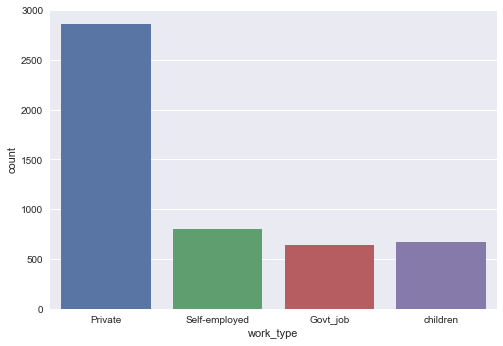

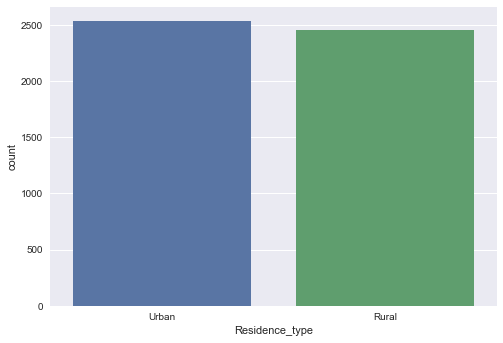

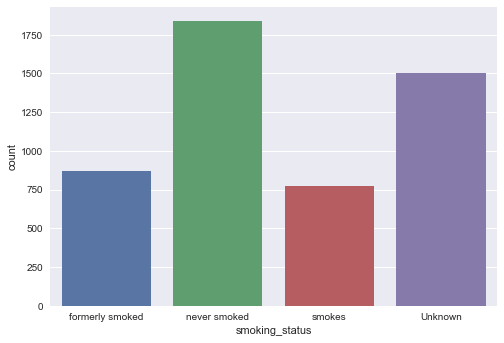

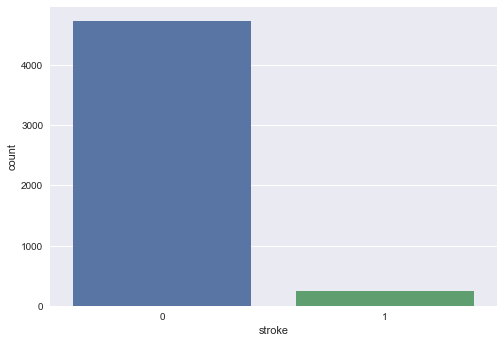

In [263]:
for i in df_cat.columns:
    sns.countplot(df_cat[i], data= df_cat)
    
    plt.show()

In [3]:
s= 'python'

i=0

while i<len(s):
    print(s[i], end='')
    i+=1

python

In [7]:
i= len(s)-1

In [8]:
while i>=0:
    print(s[i], end='')
    i=i-1

nohtyp

## Artical on why numpy is  good 

## create data frame for goussinan number

In [102]:
a = pd.DataFrame({})

In [103]:
for i in range(10):
    a[i]= np.random.randn(100)
    
a

,0,1,2,3,4,5,6,7,8,9
0,0.616035,-0.731864,0.769739,-0.402502,0.596086,-0.474069,-0.164185,1.837294,-0.372981,-0.199431
1,0.717572,1.309112,-0.559374,-0.322193,-0.271888,0.808571,-0.072750,-0.355815,0.037101,-0.346987
2,-1.903268,0.774425,-0.372074,-2.563002,-0.621310,0.074658,-0.984517,0.923470,-1.482405,0.421341
3,-1.409085,-0.334569,0.261213,-0.177641,-0.318207,1.358677,2.493077,0.167201,0.430103,-0.785548
4,1.339398,1.180523,0.182003,-0.730126,0.629070,0.485557,-1.713968,-0.276418,1.596072,-0.348260
...,...,...,...,...,...,...,...,...,...,...
95,0.807072,0.375575,1.112717,-0.931689,-0.487875,-1.379148,0.052790,-0.174471,-0.202490,-0.235442
96,1.270478,0.824676,-0.481769,-0.643513,0.350582,0.363449,-0.648412,-1.279645,-2.444887,0.431379
97,-0.332581,-0.256056,0.040248,-0.055156,0.291133,-1.377331,1.785371,2.549498,0.081358,-0.620090
98,-0.675596,-0.864129,1.360492,-1.594780,-0.368283,-0.473204,-0.709254,-0.468548,-0.730692,0.240232


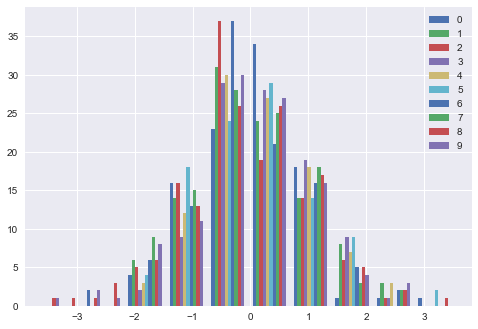

In [106]:
plt.hist(a, label=a.columns)

plt.legend()
plt.show()

In [107]:
for i in a[0]:
    print(i)

0.6160347434742501
0.7175724132781144
-1.9032678572038206
-1.4090848269965746
1.3393975616883749
-0.7502722428102827
-0.7212506925420247
-0.8210641298965512
1.5734513213972372
0.5741557985730033
-1.1704573090905181
0.5711966951222454
0.8450094680605875
-0.8027275654760603
1.173306649401041
0.07412587692313695
-1.4110050510197594
0.3067428027755273
-0.8360987819551302
1.3566860935856604
0.27438647406930605
0.10471637997488042
0.44756739006129764
0.3072553222804433
-1.7045520434445949
3.3353275124822677
-0.7450001545095004
-0.5516332516885433
0.19002870499077457
0.30221350803990676
0.9027089397757645
-0.9350331747514169
0.10398091896067298
2.292189221781178
0.06221294224955562
-0.8735962536602541
-0.4257785625770618
0.886799321693041
-0.6995217098538172
-0.5209566687673326
0.8248137528461651
0.25353137017389876
-0.7658333762601817
0.7981949083511328
1.0541277845794221
0.15815496828104722
0.1811930636628019
-2.3532277529479595
-0.8281256091987373
1.2510451341955113
1.2222801416445772
-2.2

In [120]:
x =np.random.randn(1,1,1,3,3)

In [119]:
y= np.random.randn(3,3)

In [121]:
np.matmul(x,y)

array([[[[[-1.44614098, -0.01600722, -0.37826214],
          [-1.48107189,  2.83076752, -2.94882066],
          [-2.80580197, -1.06043834, -1.37979211]]]]])

In [ ]:
new_x = x[